In [3]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

import geopandas as gpd
import json
import shapely
# import pysal as ps
from fiona.crs import from_epsg
from shapely.geometry import LineString, Point
from geopandas.tools import sjoin

# Purpose of this notebook

- Version 1: To read and visualize selected noise sensors' data! 

- Version 2: Do the case study of that one time where there is confirmed construction and try to find the shape of how that case looks like. (one of them being 12th April 2017 recording people jackhammering 8:20 AM)

## Loading Sensors Location

In [4]:
sensors = pd.read_csv('relevant_nodes.csv')

In [5]:
sensors['lonlat'] = list(zip(sensors["longitude"].values, sensors["latitude"].values))
sensors['geometry'] = sensors[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))

In [6]:
sensors.head()

,Unnamed: 0,latitude,longitude,node_id,title,lonlat,geometry
0,0,40.729982,-73.995862,sonycnode-b827ebb40450.sonyc,Pless Annex,"(-73.995862, 40.729982)",POINT (-73.995862 40.729982)
1,1,40.730388,-73.999861,sonycnode-b827eb9bed23.sonyc,Vanderbilt (facing West 3rd),"(-73.999861, 40.730388)",POINT (-73.999861 40.730388)
2,2,40.730672,-73.999813,sonycnode-b827ebf31214.sonyc,Vanderbilt (facing Mcdougel),"(-73.999813, 40.730672)",POINT (-73.999813 40.730672)
3,3,40.729608,-73.993489,sonycnode-b827eb820cfe.sonyc,719 Broadway (facing Waverly),"(-73.993489, 40.729608)",POINT (-73.993489 40.729608)
4,4,40.729985,-73.997649,sonycnode-b827eb905497.sonyc,Kimmel Center,"(-73.997649, 40.729985)",POINT (-73.997649 40.729985)


In [7]:
sensors2 = gpd.GeoDataFrame(sensors)

In [8]:
sensors2.crs = {'init' :'epsg:2263'}

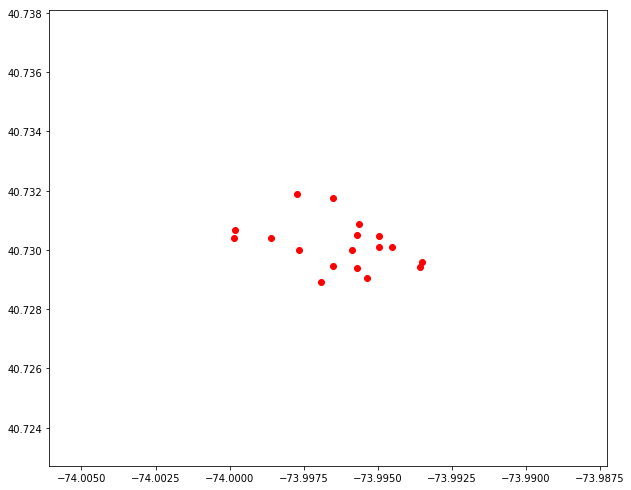

In [9]:
sensors2.plot(color='red', figsize=(10,10))


# Version 1

### Mass reading the pickle files

In [2]:
pickled_files = ['sonycnode-b827eb820cfe.sonyc.p',
 'sonycnode-b827eb8e2420.sonyc.p',
 'sonycnode-b827eb73e772.sonyc.p',
 'sonycnode-b827eb815321.sonyc.p',
 'sonycnode-b827eb329ab8.sonyc.p',
 'sonycnode-b827ebdd5c38.sonyc.p',
 'sonycnode-b827eb0d8af7.sonyc.p',
 'sonycnode-b827eb4e7821.sonyc.p',
 'sonycnode-b827eb86d458.sonyc.p']

In [3]:
len(pickled_files)

9

In [4]:
# creating a list of all the filenames
filenames=[]
for i in range(9): 
    filenames.append(pickled_files[i][:22]) #removing the file extension 

In [5]:
filenames

['sonycnode-b827eb820cfe',
 'sonycnode-b827eb8e2420',
 'sonycnode-b827eb73e772',
 'sonycnode-b827eb815321',
 'sonycnode-b827eb329ab8',
 'sonycnode-b827ebdd5c38',
 'sonycnode-b827eb0d8af7',
 'sonycnode-b827eb4e7821',
 'sonycnode-b827eb86d458']

In [6]:
dict_files = {}
for i in range(9):
    # print(filenames[i])
    dict_files[filenames[i]]= pd.read_pickle(pickled_files[i])


In [7]:
dict_files.keys()

dict_keys(['sonycnode-b827eb820cfe', 'sonycnode-b827eb8e2420', 'sonycnode-b827eb73e772', 'sonycnode-b827eb815321', 'sonycnode-b827eb329ab8', 'sonycnode-b827ebdd5c38', 'sonycnode-b827eb0d8af7', 'sonycnode-b827eb4e7821', 'sonycnode-b827eb86d458'])

In [8]:
for i in range(9):
    filenames[i] = dict_files[filenames[i]]

In [9]:
filenames[0].head()

,timestamp,dBAS
timestamp,,
2016-12-10 14:43:46.990000010-05:00,2016-12-10 19:43:46.990000010,61.939999
2016-12-10 14:43:47.990000010-05:00,2016-12-10 19:43:47.990000010,63.380001
2016-12-10 14:43:48.990000010-05:00,2016-12-10 19:43:48.990000010,63.549999
2016-12-10 14:43:49.990000010-05:00,2016-12-10 19:43:49.990000010,62.599998
2016-12-10 14:43:51-05:00,2016-12-10 19:43:51.000000000,63.270000


In [10]:
filenames[0].dtypes

timestamp    datetime64[ns]
dBAS                float32
dtype: object

### Splitting dataframe into year 2017 first as a test deep dive

Should I even be doing this?

In [11]:
year_2017 = ['sonycnode-b827eb820cfe',
 'sonycnode-b827eb8e2420',
 'sonycnode-b827eb73e772',
 'sonycnode-b827eb815321',
 'sonycnode-b827eb329ab8',
 'sonycnode-b827ebdd5c38',
 'sonycnode-b827eb0d8af7',
 'sonycnode-b827eb4e7821',
 'sonycnode-b827eb86d458']

In [12]:
dict_2017 = {}
for i in range(9):
    # print(filenames[i])
    dict_2017[year_2017[i]]= filenames[i][filenames[i]['timestamp'].dt.year == 2017]

In [13]:
for i in range(9):
    year_2017[i] = dict_2017[year_2017[i]]

In [14]:
year_2017[7].head()

,timestamp,dBAS
timestamp,,
2016-12-31 19:00:00.089999914-05:00,2017-01-01 00:00:00.089999914,60.610001
2016-12-31 19:00:02.089999914-05:00,2017-01-01 00:00:02.089999914,60.290001
2016-12-31 19:00:03.089999914-05:00,2017-01-01 00:00:03.089999914,60.540001
2016-12-31 19:00:04.099999905-05:00,2017-01-01 00:00:04.099999905,61.200001
2016-12-31 19:00:05.089999914-05:00,2017-01-01 00:00:05.089999914,60.540001


In [15]:
year_2018 = ['sonycnode-b827eb820cfe',
 'sonycnode-b827eb8e2420',
 'sonycnode-b827eb73e772',
 'sonycnode-b827eb815321',
 'sonycnode-b827eb329ab8',
 'sonycnode-b827ebdd5c38',
 'sonycnode-b827eb0d8af7',
 'sonycnode-b827eb4e7821',
 'sonycnode-b827eb86d458']

In [16]:
dict_2018 = {}
for i in range(9):
    # print(filenames[i])
    dict_2018[year_2018[i]]= filenames[i][filenames[i]['timestamp'].dt.year == 2018]

In [17]:
for i in range(9):
    year_2018[i] = dict_2018[year_2018[i]]

### Further splitting dataframe to be from Sept to Nov

In [18]:
year_2017_911 = ['sonycnode-b827eb820cfe',
 'sonycnode-b827eb8e2420',
 'sonycnode-b827eb73e772',
 'sonycnode-b827eb815321',
 'sonycnode-b827eb329ab8',
 'sonycnode-b827ebdd5c38',
 'sonycnode-b827eb0d8af7',
 'sonycnode-b827eb4e7821',
 'sonycnode-b827eb86d458']

In [19]:
dict_2017_911 = {}
for i in range(9):
    # print(filenames[i])
    dict_2017_911[year_2017_911[i]]= year_2017[i][(year_2017[i]['timestamp'].dt.month == 9) | (year_2017[i]['timestamp'].dt.month == 10) | (year_2017[i]['timestamp'].dt.month == 11)]

In [20]:
for i in range(9):
    year_2017_911[i] = dict_2017_911[year_2017_911[i]]

### Only want for individual months of Sept

September

In [21]:
year_2017_9 = ['sonycnode-b827eb820cfe',
 'sonycnode-b827eb8e2420',
 'sonycnode-b827eb73e772',
 'sonycnode-b827eb815321',
 'sonycnode-b827eb329ab8',
 'sonycnode-b827ebdd5c38',
 'sonycnode-b827eb0d8af7',
 'sonycnode-b827eb4e7821',
 'sonycnode-b827eb86d458']

In [22]:
dict_2017_9 = {}
for i in range(9):
    # print(filenames[i])
    dict_2017_9[year_2017_9[i]]= year_2017[i][(year_2017[i]['timestamp'].dt.month == 9)]

In [23]:
for i in range(9):
    year_2017_9[i] = dict_2017_9[year_2017_9[i]]

### Only want one day in September

In [24]:
year_2017_9_d = ['sonycnode-b827eb820cfe',
 'sonycnode-b827eb8e2420',
 'sonycnode-b827eb73e772',
 'sonycnode-b827eb815321',
 'sonycnode-b827eb329ab8',
 'sonycnode-b827ebdd5c38',
 'sonycnode-b827eb0d8af7',
 'sonycnode-b827eb4e7821',
 'sonycnode-b827eb86d458']

In [25]:
year_2017[1]['date_only'] = year_2017[1]['timestamp'].apply(lambda x: x.date())
df1 = year_2017[1][year_2017[1]['date_only'] == '2017-09-01']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
year_2017[1][year_2017[1]["date_only"] == '2017-01-11']

,timestamp,dBAS,date_only
timestamp,,,


# Resampling

Learnt that resampling is a very powerful timeseries tool! Can resample into daily, weekly, etc

Have checked that I don't need to reset the index

### Weekly Resampling

In [27]:
year_2017_w = ['sonycnode-b827eb820cfe',
 'sonycnode-b827eb8e2420',
 'sonycnode-b827eb73e772',
 'sonycnode-b827eb815321',
 'sonycnode-b827eb329ab8',
 'sonycnode-b827ebdd5c38',
 'sonycnode-b827eb0d8af7',
 'sonycnode-b827eb4e7821',
 'sonycnode-b827eb86d458']

In [28]:
dict_2017_w = {}

for i in range(9):
    dict_2017_w[year_2017_w[i]] = year_2017[i].resample('W', on='timestamp').mean().reset_index()

In [29]:
for i in range(9):
    year_2017_w[i] = dict_2017_w[year_2017_w[i]]
    year_2017_w[i]['timestamp'] = pd.to_datetime(year_2017_w[i]['timestamp'])

In [30]:
year_2017_w[0].dtypes

timestamp    datetime64[ns]
dBAS                float32
dtype: object

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


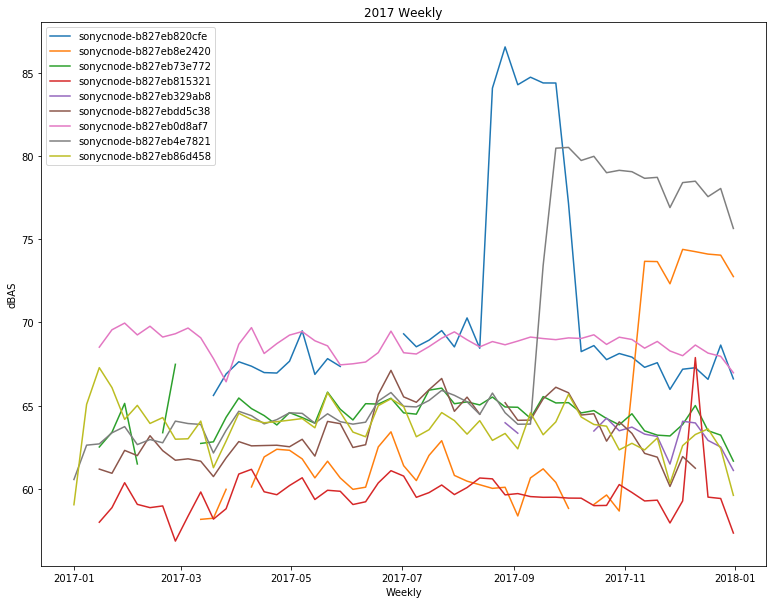

In [31]:
# code credit @ https://stackoverflow.com/questions/45467320/plot-multiple-pandas-dataframes-in-one-graph

fig = plt.figure(figsize=(13,10))

for i in range(9):
    for frame in [year_2017_w[i]]:
        label = dict_2017_w.keys()
        plt.plot(frame['timestamp'], frame['dBAS'])
        plt.legend(label)
        

plt.xlim()
plt.xlabel('Weekly')
plt.ylim()
plt.ylabel('dBAS')
plt.title('2017 Weekly')
plt.show()

Observed that there seems to be a lag effect between 4 sensors:
- The Blue (sonycnode-b827eb820cfe)
- The Grey (sonycnode-b827eb4e7821)
- The Orange (sonycnode-b827eb8e2420)
- The Red (sonycnode-b827eb815321)

Let's single them out and plot the rest to see if they correspond w each other too

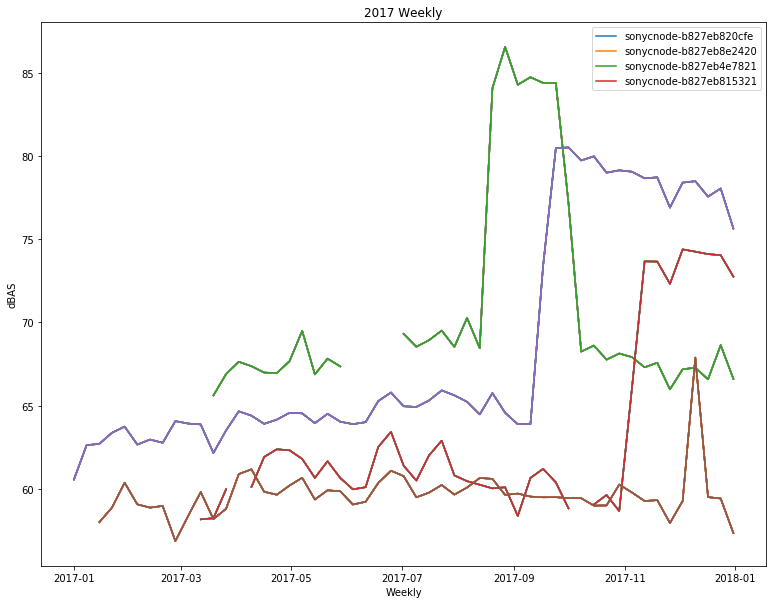

In [32]:
fig = plt.figure(figsize=(13,10))

for i in range(9):
    for frame in [year_2017_w[0], year_2017_w[1],year_2017_w[7],year_2017_w[3]]:
        plt.plot(frame['timestamp'], frame['dBAS'])
        label = ['sonycnode-b827eb820cfe','sonycnode-b827eb8e2420','sonycnode-b827eb4e7821','sonycnode-b827eb815321']
        plt.legend(label)
        

plt.xlim()
plt.xlabel('Weekly')
plt.ylim()
plt.ylabel('dBAS')
plt.title('2017 Weekly')
plt.show()

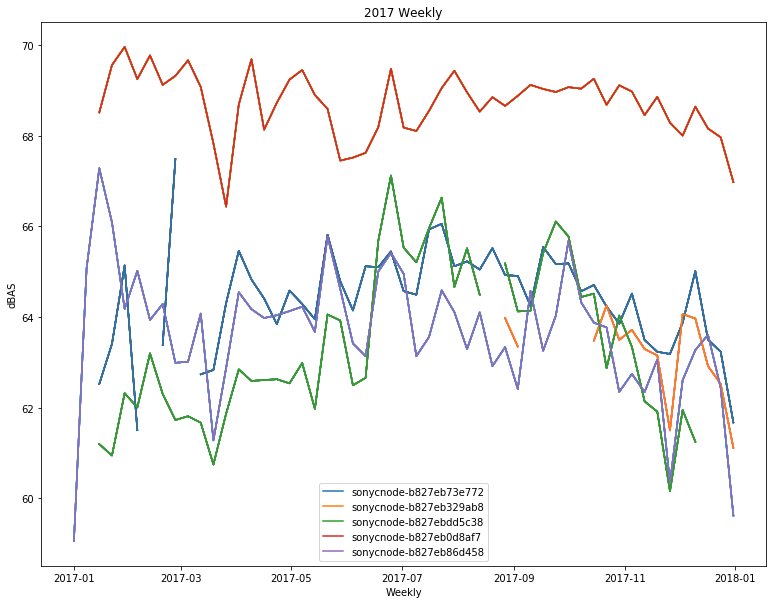

In [33]:
fig = plt.figure(figsize=(13,10))

for i in range(9):
    for frame in [year_2017_w[2], year_2017_w[4],year_2017_w[5],year_2017_w[6],year_2017_w[8]]:
        plt.plot(frame['timestamp'], frame['dBAS'])
        label = ['sonycnode-b827eb73e772','sonycnode-b827eb329ab8','sonycnode-b827ebdd5c38','sonycnode-b827eb0d8af7','sonycnode-b827eb86d458']
        plt.legend(label)
        

plt.xlim()
plt.xlabel('Weekly')
plt.ylim()
plt.ylabel('dBAS')
plt.title('2017 Weekly')
plt.show()

### Hourly resampling

In [34]:
year_2017_h = ['sonycnode-b827eb820cfe',
 'sonycnode-b827eb8e2420',
 'sonycnode-b827eb73e772',
 'sonycnode-b827eb815321',
 'sonycnode-b827eb329ab8',
 'sonycnode-b827ebdd5c38',
 'sonycnode-b827eb0d8af7',
 'sonycnode-b827eb4e7821',
 'sonycnode-b827eb86d458']

In [35]:
dict_2017_h = {}

for i in range(9):
    dict_2017_h[year_2017_h[i]] = year_2017_911[i].resample('60min', on='timestamp').mean().reset_index()

In [36]:
for i in range(9):
    year_2017_h[i] = dict_2017_h[year_2017_h[i]]
    year_2017_h[i]['timestamp'] = pd.to_datetime(year_2017_h[i]['timestamp'])

In [37]:
year_2017_h[0].dtypes

timestamp    datetime64[ns]
dBAS                float32
dtype: object

In [38]:
year_2017_h[0].head()

,timestamp,dBAS
0,2017-09-01 00:00:00,86.874893
1,2017-09-01 01:00:00,86.076744
2,2017-09-01 02:00:00,85.713188
3,2017-09-01 03:00:00,85.234238
4,2017-09-01 04:00:00,86.665413


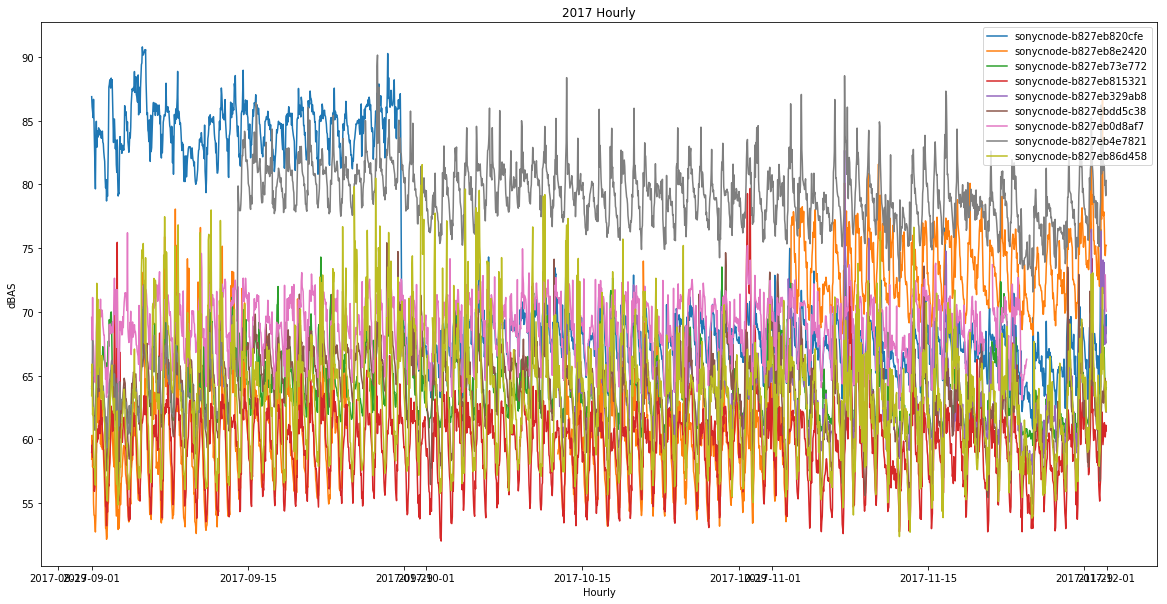

In [39]:

fig = plt.figure(figsize=(20,10))

for i in range(9):
    for frame in [year_2017_h[i]]:
        label = dict_2017_h.keys()
        plt.plot(frame['timestamp'], frame['dBAS'])
        plt.legend(label)
        

plt.xlim()
plt.xlabel('Hourly')
plt.ylim()
plt.ylabel('dBAS')
plt.title('2017 Hourly')
plt.show()

Hourly resampling for September

In [40]:
year_2017_9h = ['sonycnode-b827eb820cfe',
 'sonycnode-b827eb8e2420',
 'sonycnode-b827eb73e772',
 'sonycnode-b827eb815321',
 'sonycnode-b827eb329ab8',
 'sonycnode-b827ebdd5c38',
 'sonycnode-b827eb0d8af7',
 'sonycnode-b827eb4e7821',
 'sonycnode-b827eb86d458']

In [41]:
dict_2017_9h = {}

for i in range(9):
    dict_2017_9h[year_2017_9h[i]] = year_2017_9[i].resample('60min', on='timestamp').mean().reset_index()

In [42]:
for i in range(9):
    year_2017_9h[i] = dict_2017_9h[year_2017_9h[i]]
    year_2017_9h[i]['timestamp'] = pd.to_datetime(year_2017_9h[i]['timestamp'])

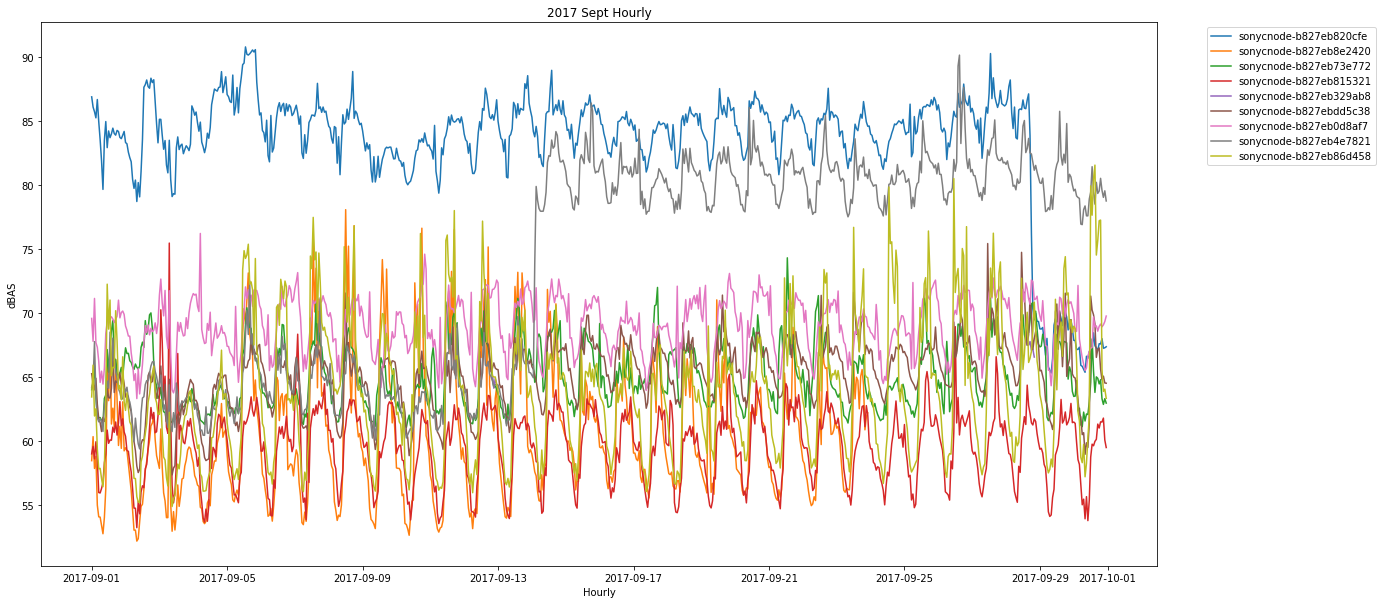

In [43]:
fig = plt.figure(figsize=(20,10))

for i in range(9):
    for frame in [year_2017_9h[i]]:
        label = dict_2017_9h.keys()
        plt.plot(frame['timestamp'], frame['dBAS'])
#         plt.legend(label)
        plt.legend(label,bbox_to_anchor=(1.04,1), loc="upper left")
        

plt.xlim()
plt.xlabel('Hourly')
plt.ylim()
plt.ylabel('dBAS')
plt.title('2017 Sept Hourly')
plt.show()

Feedback received that we should scale down to daily mintues instead

# New Version 2: 

Do the case study of that one time where there is confirmed construction and try to find the shape of how that case looks like. 

(one of them being 12th April recording people jackhammering 8:20 AM)


**2017**

In [44]:
year_2017_4 = ['sonycnode-b827eb820cfe',
 'sonycnode-b827eb8e2420',
 'sonycnode-b827eb73e772',
 'sonycnode-b827eb815321',
 'sonycnode-b827eb329ab8',
 'sonycnode-b827ebdd5c38',
 'sonycnode-b827eb0d8af7',
 'sonycnode-b827eb4e7821',
 'sonycnode-b827eb86d458']

In [45]:
# Retrieving only the date of interest
dict_2017_4 = {}
for i in range(9):
    # print(filenames[i])
    dict_2017_4[year_2017_4[i]]= year_2017[i][(year_2017[i]['timestamp'].dt.month == 4)&(year_2017[i]['timestamp'].dt.day == 12)]

In [46]:
dict_2017_4[year_2017_4[0]].head()

,timestamp,dBAS
timestamp,,
2017-04-11 20:00:00.809999943-04:00,2017-04-12 00:00:00.809999943,68.919998
2017-04-11 20:00:01.809999943-04:00,2017-04-12 00:00:01.809999943,68.500000
2017-04-11 20:00:02.809999943-04:00,2017-04-12 00:00:02.809999943,68.540001
2017-04-11 20:00:03.809999943-04:00,2017-04-12 00:00:03.809999943,68.360001
2017-04-11 20:00:04.809999943-04:00,2017-04-12 00:00:04.809999943,68.529999


In [47]:
for i in range(9):
    year_2017_4[i] = dict_2017_4[year_2017_4[i]]

**2018**

In [48]:
year_2018_4 = ['sonycnode-b827eb820cfe',
 'sonycnode-b827eb8e2420',
 'sonycnode-b827eb73e772',
 'sonycnode-b827eb815321',
 'sonycnode-b827eb329ab8',
 'sonycnode-b827ebdd5c38',
 'sonycnode-b827eb0d8af7',
 'sonycnode-b827eb4e7821',
 'sonycnode-b827eb86d458']

In [49]:
# Retrieving only the date of interest
dict_2018_4 = {}
for i in range(9):
    # print(filenames[i])
    dict_2018_4[year_2018_4[i]]= year_2018[i][(year_2018[i]['timestamp'].dt.month == 4)&(year_2018[i]['timestamp'].dt.day == 12)]
    

In [50]:
for i in range(9):
    year_2018_4[i] = dict_2018_4[year_2018_4[i]]

### Resampling (2017)

In [114]:
year_2017_m = ['sonycnode-b827eb820cfe',
 'sonycnode-b827eb8e2420',
 'sonycnode-b827eb73e772',
 'sonycnode-b827eb815321',
 'sonycnode-b827eb329ab8',
 'sonycnode-b827ebdd5c38',
 'sonycnode-b827eb0d8af7',
 'sonycnode-b827eb4e7821',
 'sonycnode-b827eb86d458']

In [115]:
dict_2017_m = {}

for i in range(9):
    year_2017_4[i] = year_2017_4[i].reset_index(drop=True)
    dict_2017_m[year_2017_m[i]] = year_2017_4[i].resample('1min', on='timestamp').mean().reset_index()
    dict_2017_m[year_2017_m[i]]['time'] = [d.time() for d in dict_2017_m[year_2017_m[i]]['timestamp']]

In [116]:
for i in range(9):
    year_2017_m[i] = dict_2017_m[year_2017_m[i]]

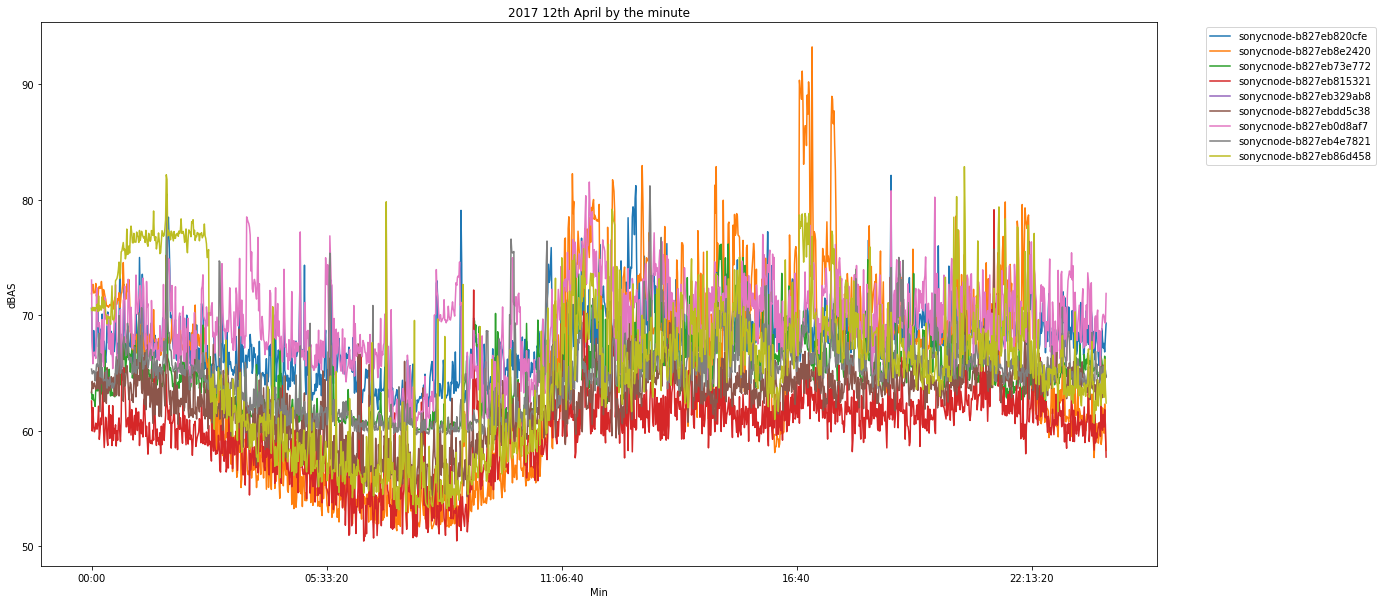

In [118]:
fig = plt.figure(figsize=(20,10))

for i in range(9):
    for frame in [year_2017_m[i]]:
        label = dict_2017_m.keys()
        plt.plot(frame['time'], frame['dBAS'])
#         plt.legend(label)
        plt.legend(label,bbox_to_anchor=(1.04,1), loc="upper left")
        

plt.xlim()
plt.xlabel('Min')
plt.ylim()
plt.ylabel('dBAS')
plt.title('2017 12th April by the minute')
plt.show()

Zooming in to time period of interest

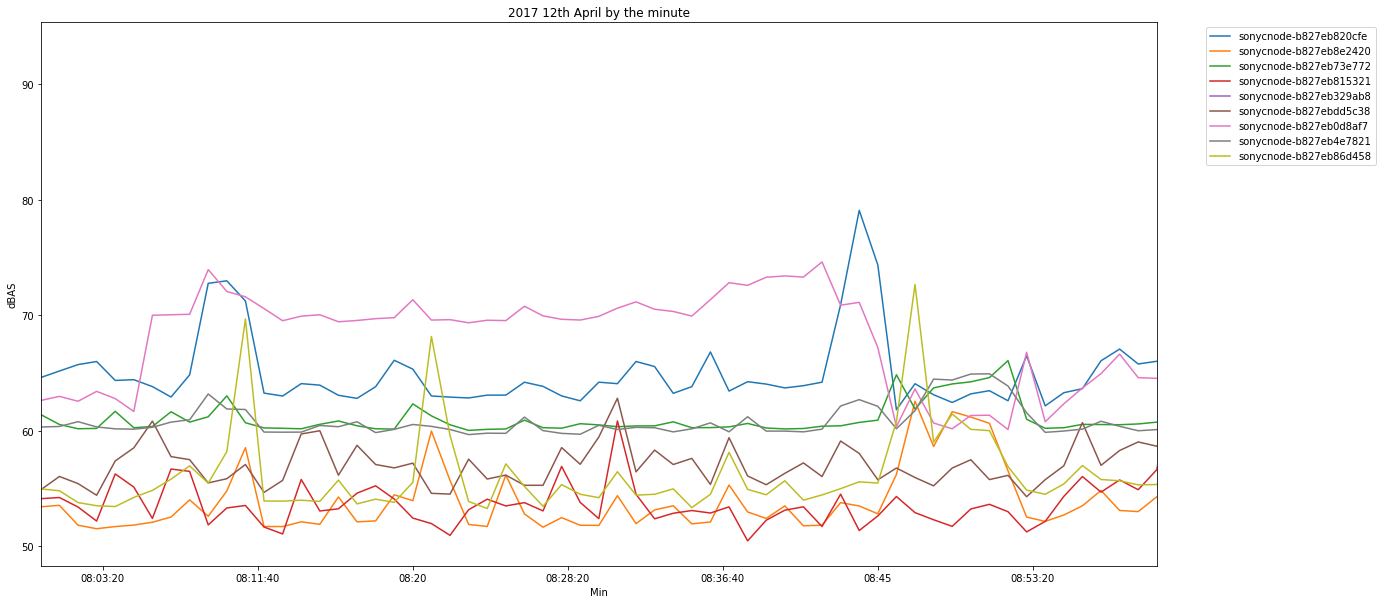

In [120]:
fig = plt.figure(figsize=(20,10))

for i in range(9):
    for frame in [year_2017_m[i]]:
        label = dict_2017_m.keys()
        plt.plot(frame['time'], frame['dBAS'])
#         plt.legend(label)
        plt.legend(label,bbox_to_anchor=(1.04,1), loc="upper left")
        

plt.xlim(['08:00:00','09:00:00'])
plt.xlabel('Min')
plt.ylim()
plt.ylabel('dBAS')
plt.title('2017 12th April by the minute')
plt.show()

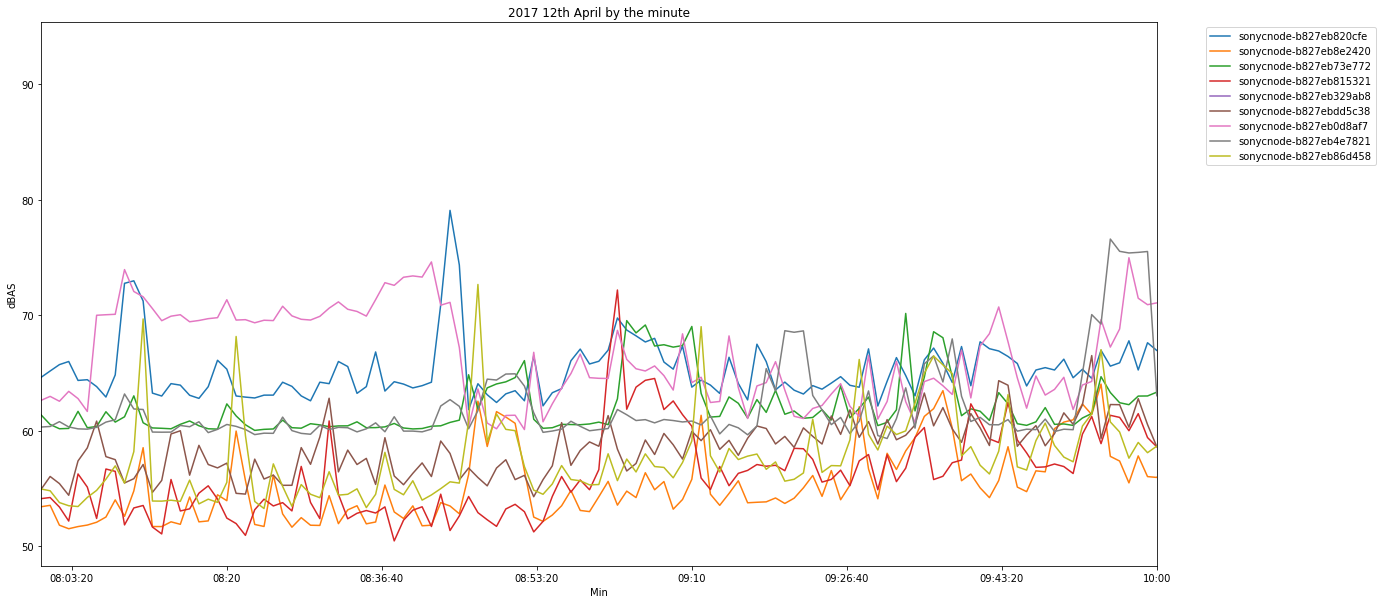

In [126]:
fig = plt.figure(figsize=(20,10))

for i in range(9):
    for frame in [year_2017_m[i]]:
        label = dict_2017_m.keys()
        plt.plot(frame['time'], frame['dBAS'])
#         plt.legend(label)
        plt.legend(label,bbox_to_anchor=(1.04,1), loc="upper left")
        

plt.xlim(['08:00:00','10:00:00'])
plt.xlabel('Min')
plt.ylim()
plt.ylabel('dBAS')
plt.title('2017 12th April by the minute')
plt.show()

### Resampling (2018)

In [84]:
year_2018_m = ['sonycnode-b827eb820cfe',
 'sonycnode-b827eb8e2420',
 'sonycnode-b827eb73e772',
 'sonycnode-b827eb815321',
 'sonycnode-b827eb329ab8',
 'sonycnode-b827ebdd5c38',
 'sonycnode-b827eb0d8af7',
 'sonycnode-b827eb4e7821',
 'sonycnode-b827eb86d458']

In [87]:
dict_2018_m = {}

for i in range(9):
    year_2018_4[i] = year_2018_4[i].reset_index(drop=True)
    year_2018_m[i] = year_2018_4[i].resample('1min', on='timestamp').mean().reset_index()
    year_2018_m[i]['time'] = [d.time() for d in year_2018_m[i]['timestamp']]

In [88]:
year_2018_m[8].head()

,timestamp,dBAS,time
0,2018-04-12 00:00:00,62.000832,00:00:00
1,2018-04-12 00:01:00,61.317665,00:01:00
2,2018-04-12 00:02:00,60.425999,00:02:00
3,2018-04-12 00:03:00,60.725166,00:03:00
4,2018-04-12 00:04:00,62.651669,00:04:00


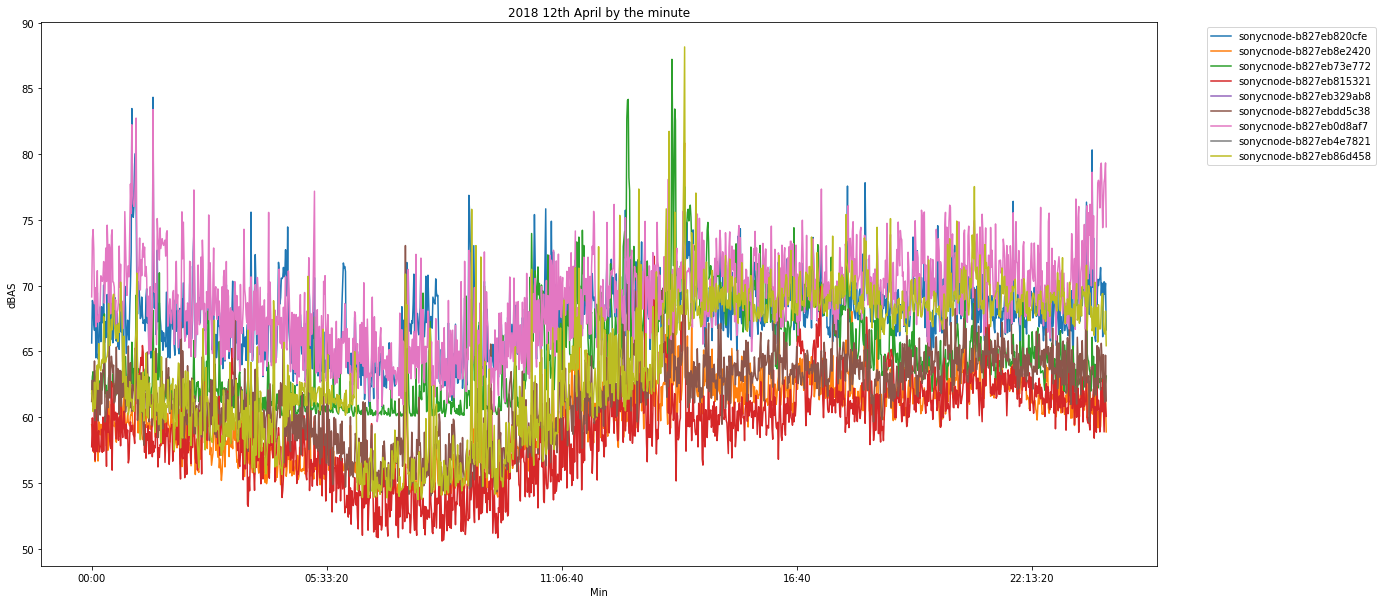

In [121]:
fig = plt.figure(figsize=(20,10))

for i in range(9):
    for frame in [year_2018_m[i]]:
        label = dict_2017_m.keys()
        plt.plot(frame['time'], frame['dBAS'])
#         plt.legend(label)
        plt.legend(label,bbox_to_anchor=(1.04,1), loc="upper left")
        

plt.xlim()
plt.xlabel('Min')
plt.ylim()
plt.ylabel('dBAS')
plt.title('2018 12th April by the minute')
plt.show()

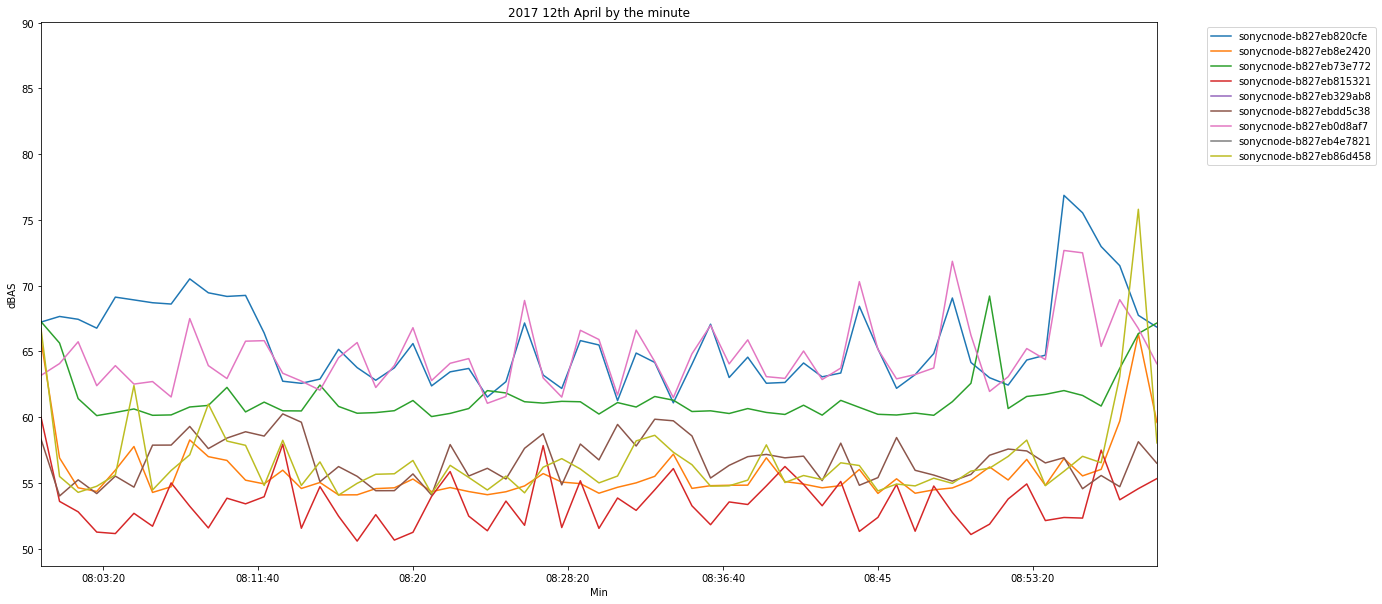

In [122]:
fig = plt.figure(figsize=(20,10))

for i in range(9):
    for frame in [year_2018_m[i]]:
        label = dict_2017_m.keys()
        plt.plot(frame['time'], frame['dBAS'])
#         plt.legend(label)
        plt.legend(label,bbox_to_anchor=(1.04,1), loc="upper left")
        

plt.xlim(['08:00:00','09:00:00'])
plt.xlabel('Min')
plt.ylim()
plt.ylabel('dBAS')
plt.title('2017 12th April by the minute')
plt.show()

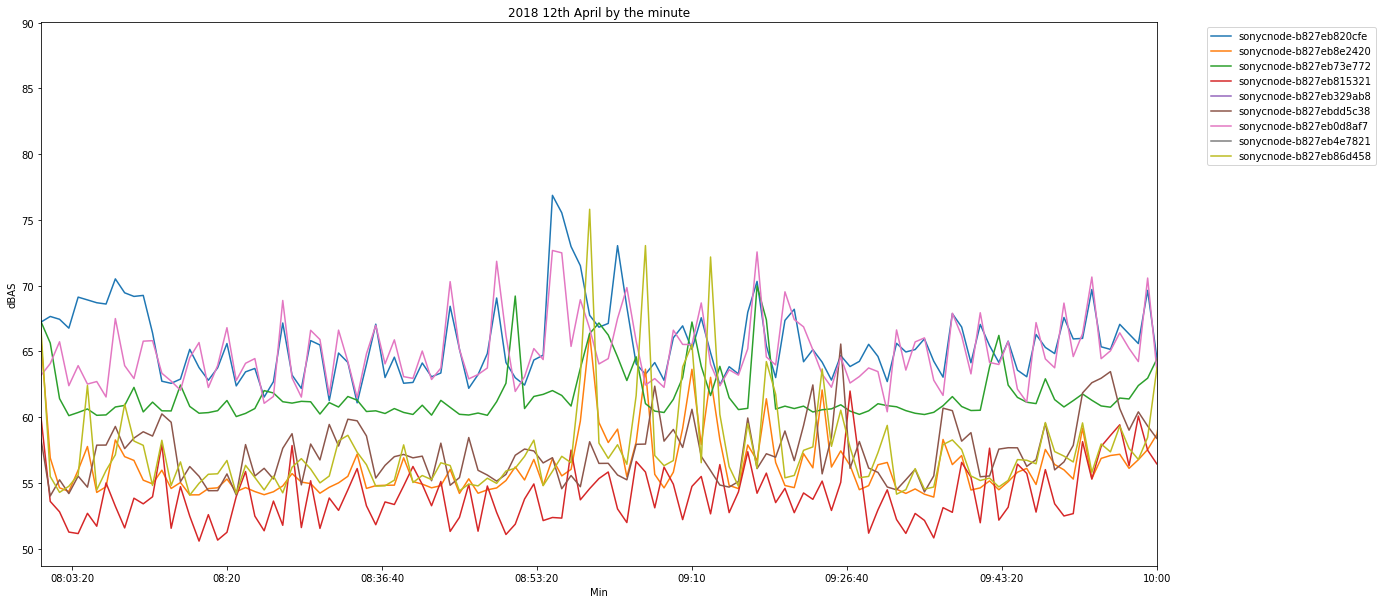

In [127]:
fig = plt.figure(figsize=(20,10))

for i in range(9):
    for frame in [year_2018_m[i]]:
        label = dict_2017_m.keys()
        plt.plot(frame['time'], frame['dBAS'])
#         plt.legend(label)
        plt.legend(label,bbox_to_anchor=(1.04,1), loc="upper left")
        

plt.xlim(['08:00:00','10:00:00'])
plt.xlabel('Min')
plt.ylim()
plt.ylabel('dBAS')
plt.title('2018 12th April by the minute')
plt.show()